# Project 1 - Statistical Learning

Dataset - Laliga.csv

La Liga is the men's top professional football division of the Spanish football league system.


In [1]:
# Import Basic Libraries
import numpy as np
import pandas as pd

# Import Matplotlib and Seaborn for data visualization
import matplotlib.pyplot as plt
%matplotlib inline

### Question 1: Read the dataset and replace the dashes with 0 to make sure you can perform arithmetic operations on the data

In [2]:
# Read the dataset
laliga = pd.read_csv('Laliga.csv', header=1) # Setting header to 1 as first row is blank
laliga.head(10)

,Pos,Team,Seasons,Points,GamesPlayed,GamesWon,GamesDrawn,GamesLost,GoalsFor,GoalsAgainst,Champion,Runner-up,Third,Fourth,Fifth,Sixth,T,Debut,Since/LastApp,BestPosition
0,1,Real Madrid,86,4385,2762,1647,552,563,5947,3140,33,23,8,8,3,4,79,1929,1929,1
1,2,Barcelona,86,4262,2762,1581,573,608,5900,3114,25,25,12,12,4,6,83,1929,1929,1
2,3,Atletico Madrid,80,3442,2614,1241,598,775,4534,3309,10,8,16,9,7,6,56,1929,2002-03,1
3,4,Valencia,82,3386,2664,1187,616,861,4398,3469,6,6,10,11,10,7,50,1931-32,1987-88,1
4,5,Athletic Bilbao,86,3368,2762,1209,633,920,4631,3700,8,7,10,5,8,10,49,1929,1929,1
5,6,Sevilla,73,2819,2408,990,531,887,3680,3373,1,4,4,5,12,6,32,1934-35,2001-02,1
6,7,Espanyol,82,2792,2626,948,608,1070,3609,3889,-,-,4,5,2,5,16,1929,1994-95,3
7,8,Real Sociedad,70,2573,2302,864,577,861,3228,3230,2,3,2,5,4,3,19,1929,2010-11,1
8,9,Zaragoza,58,2109,1986,698,522,766,2683,2847,-,1,4,5,4,4,18,1939-40,2012-13,2
9,10,Real Betis,51,1884,1728,606,440,682,2159,2492,1,-,2,3,4,4,14,1932-33,2015-16,1


In [3]:
# Replace the '-' with 0
laliga = laliga.replace('-',0)
laliga.head(10)

,Pos,Team,Seasons,Points,GamesPlayed,GamesWon,GamesDrawn,GamesLost,GoalsFor,GoalsAgainst,Champion,Runner-up,Third,Fourth,Fifth,Sixth,T,Debut,Since/LastApp,BestPosition
0,1,Real Madrid,86,4385,2762,1647,552,563,5947,3140,33,23,8,8,3,4,79,1929,1929,1
1,2,Barcelona,86,4262,2762,1581,573,608,5900,3114,25,25,12,12,4,6,83,1929,1929,1
2,3,Atletico Madrid,80,3442,2614,1241,598,775,4534,3309,10,8,16,9,7,6,56,1929,2002-03,1
3,4,Valencia,82,3386,2664,1187,616,861,4398,3469,6,6,10,11,10,7,50,1931-32,1987-88,1
4,5,Athletic Bilbao,86,3368,2762,1209,633,920,4631,3700,8,7,10,5,8,10,49,1929,1929,1
5,6,Sevilla,73,2819,2408,990,531,887,3680,3373,1,4,4,5,12,6,32,1934-35,2001-02,1
6,7,Espanyol,82,2792,2626,948,608,1070,3609,3889,0,0,4,5,2,5,16,1929,1994-95,3
7,8,Real Sociedad,70,2573,2302,864,577,861,3228,3230,2,3,2,5,4,3,19,1929,2010-11,1
8,9,Zaragoza,58,2109,1986,698,522,766,2683,2847,0,1,4,5,4,4,18,1939-40,2012-13,2
9,10,Real Betis,51,1884,1728,606,440,682,2159,2492,1,0,2,3,4,4,14,1932-33,2015-16,1


In [4]:
#1 Understanding Data

#1.1 Rows and Columns
laliga.shape

(61, 20)

In [5]:
#1.2 Column data type
laliga.dtypes

Pos               int64
Team             object
Seasons           int64
Points           object
GamesPlayed      object
GamesWon         object
GamesDrawn       object
GamesLost        object
GoalsFor         object
GoalsAgainst     object
Champion         object
Runner-up        object
Third            object
Fourth           object
Fifth            object
Sixth            object
T                object
Debut            object
Since/LastApp    object
BestPosition      int64
dtype: object

In [6]:
# Data Preprocessing - As we can see that most of the logically numeric columns have data type as 'object'

# Converting 'object' to 'int' so that we can use these columns for arithmetic operatios
laliga.iloc[0:61,3:17] = laliga.iloc[0:61,3:17].astype(str).astype('int64')

laliga.dtypes

Pos               int64
Team             object
Seasons           int64
Points            int64
GamesPlayed       int64
GamesWon          int64
GamesDrawn        int64
GamesLost         int64
GoalsFor          int64
GoalsAgainst      int64
Champion          int64
Runner-up         int64
Third             int64
Fourth            int64
Fifth             int64
Sixth             int64
T                 int64
Debut            object
Since/LastApp    object
BestPosition      int64
dtype: object

### Question 2: Print all teams which have started playing b/w 1930 - 1980

In [7]:
#1 Data Pre-processing required as Debut is having mixed entries few with year number only and few year - year format

#1.1 Using split function to split the column into two on the basis of '-'
laliga['debut_year'], laliga['split_col'] = laliga['Debut'].str.split('-',1).str

#1.2 Dropping the unwanted split col from dataset
laliga.drop('split_col', axis = 1, inplace=True)

laliga.head(5)

,Pos,Team,Seasons,Points,GamesPlayed,GamesWon,GamesDrawn,GamesLost,GoalsFor,GoalsAgainst,...,Runner-up,Third,Fourth,Fifth,Sixth,T,Debut,Since/LastApp,BestPosition,debut_year
0,1,Real Madrid,86,4385,2762,1647,552,563,5947,3140,...,23,8,8,3,4,79,1929,1929,1,1929
1,2,Barcelona,86,4262,2762,1581,573,608,5900,3114,...,25,12,12,4,6,83,1929,1929,1,1929
2,3,Atletico Madrid,80,3442,2614,1241,598,775,4534,3309,...,8,16,9,7,6,56,1929,2002-03,1,1929
3,4,Valencia,82,3386,2664,1187,616,861,4398,3469,...,6,10,11,10,7,50,1931-32,1987-88,1,1931
4,5,Athletic Bilbao,86,3368,2762,1209,633,920,4631,3700,...,7,10,5,8,10,49,1929,1929,1,1929


In [8]:
#1.3 Data type of 'debut_year' column created
laliga.debut_year.dtype

dtype('O')

In [9]:
#1.4 Note that data type for 'debut_year' column is "Object" hence, we need to convert it into int for Aritmatic operations
laliga['debut_year'] = laliga['debut_year'].astype(str).astype('int64')
laliga.debut_year.dtype

dtype('int64')

In [10]:
#2 Print all teams which have started playing b/w 1930 - 1980

In [11]:
# 2.1 Print 'only' team names and year of debut which have started playing b/w 1930 - 1980 (including both the years)
laliga[(laliga['debut_year']>=1930) & (laliga['debut_year']<=1980)][['Team','Debut']]

,Team,Debut
3,Valencia,1931-32
5,Sevilla,1934-35
8,Zaragoza,1939-40
9,Real Betis,1932-33
10,Deportivo La Coruna,1941-42
11,Celta Vigo,1939-40
12,Valladolid,1948-49
14,Sporting Gijon,1944-45
15,Osasuna,1935-36
16,Malaga,1949-50


In [12]:
# 2.2 Print team names with other details which have started playing b/w 1930 - 1980 (including both the years)
laliga[(laliga['debut_year']>=1930) & (laliga['debut_year']<=1980)]

,Pos,Team,Seasons,Points,GamesPlayed,GamesWon,GamesDrawn,GamesLost,GoalsFor,GoalsAgainst,...,Runner-up,Third,Fourth,Fifth,Sixth,T,Debut,Since/LastApp,BestPosition,debut_year
3,4,Valencia,82,3386,2664,1187,616,861,4398,3469,...,6,10,11,10,7,50,1931-32,1987-88,1,1931
5,6,Sevilla,73,2819,2408,990,531,887,3680,3373,...,4,4,5,12,6,32,1934-35,2001-02,1,1934
8,9,Zaragoza,58,2109,1986,698,522,766,2683,2847,...,1,4,5,4,4,18,1939-40,2012-13,2,1939
9,10,Real Betis,51,1884,1728,606,440,682,2159,2492,...,0,2,3,4,4,14,1932-33,2015-16,1,1932
10,11,Deportivo La Coruna,45,1814,1530,563,392,575,2052,2188,...,5,4,1,0,1,12,1941-42,2014-15,1,1941
11,12,Celta Vigo,51,1789,1698,586,389,723,2278,2624,...,0,0,2,4,5,11,1939-40,2012-13,4,1939
12,13,Valladolid,42,1471,1466,463,384,619,1767,2180,...,0,0,1,1,1,3,1948-49,2013-14,4,1948
14,15,Sporting Gijon,43,1389,1458,471,358,629,1753,2152,...,1,1,2,2,1,7,1944-45,2015-16,2,1944
15,16,Osasuna,37,1351,1318,426,327,565,1500,1834,...,0,0,2,2,2,6,1935-36,2016-17,4,1935
16,17,Malaga,36,1314,1255,390,330,535,1421,1763,...,0,0,1,0,1,2,1949-50,2008-09,4,1949


Result: 37 Teams started playing between 1930 - 1980

### Question 3: Print the list of teams which came Top 5 in terms of points

In [13]:
# Method 1: Sort Teams by points in descending order and print Team name and points of Top 5 using head
laliga.sort_values('Points', ascending = False).head(5)[['Team','Points']]

,Team,Points
0,Real Madrid,4385
1,Barcelona,4262
2,Atletico Madrid,3442
3,Valencia,3386
4,Athletic Bilbao,3368


In [14]:
# Method 2: Sort Teams by points in descending order and print all details of Top 5 using head
laliga.sort_values('Points', ascending = False).head(5)

,Pos,Team,Seasons,Points,GamesPlayed,GamesWon,GamesDrawn,GamesLost,GoalsFor,GoalsAgainst,...,Runner-up,Third,Fourth,Fifth,Sixth,T,Debut,Since/LastApp,BestPosition,debut_year
0,1,Real Madrid,86,4385,2762,1647,552,563,5947,3140,...,23,8,8,3,4,79,1929,1929,1,1929
1,2,Barcelona,86,4262,2762,1581,573,608,5900,3114,...,25,12,12,4,6,83,1929,1929,1,1929
2,3,Atletico Madrid,80,3442,2614,1241,598,775,4534,3309,...,8,16,9,7,6,56,1929,2002-03,1,1929
3,4,Valencia,82,3386,2664,1187,616,861,4398,3469,...,6,10,11,10,7,50,1931-32,1987-88,1,1931
4,5,Athletic Bilbao,86,3368,2762,1209,633,920,4631,3700,...,7,10,5,8,10,49,1929,1929,1,1929


In [15]:
# Method 3: Use of nlargest fuction
laliga.nlargest(5, 'Points')[['Team','Points']]

,Team,Points
0,Real Madrid,4385
1,Barcelona,4262
2,Atletico Madrid,3442
3,Valencia,3386
4,Athletic Bilbao,3368


### Question 4: Write a function with name “Goal_diff_count” which should return all the teams with their Goal Differences. Using the same function, find the team which has maximum and minimum goal difference.

In [16]:
# Part 1: Creating a function to calculate and return the goal difference
def Goal_diff_count(GF,GA):
    Goal_diff_count = GF-GA
    return Goal_diff_count

# Part 2: Passing values in function and saving the return value it in a new variable named 'Goal_diff_count'
laliga['Goal_diff_count'] = Goal_diff_count(laliga['GoalsFor'],laliga['GoalsAgainst'])
print (laliga[['Team','Goal_diff_count']])

                   Team  Goal_diff_count
0           Real Madrid             2807
1             Barcelona             2786
2       Atletico Madrid             1225
3              Valencia              929
4       Athletic Bilbao              931
5               Sevilla              307
6              Espanyol             -280
7         Real Sociedad               -2
8              Zaragoza             -164
9            Real Betis             -333
10  Deportivo La Coruna             -136
11           Celta Vigo             -346
12           Valladolid             -413
13     Racing Santander             -525
14       Sporting Gijon             -399
15              Osasuna             -334
16               Malaga             -342
17               Oviedo             -309
18             Mallorca             -189
19           Las Palmas             -399
20           Villarreal              103
21              Granada             -338
22       Rayo Vallecano             -328
23              

In [17]:
# Part 3: Team with Maximun Goal Difference
print("Team with Maximum Goal Difference")
laliga[laliga['Goal_diff_count'] == laliga['Goal_diff_count'].max()][['Team','Goal_diff_count']]

Team with Maximum Goal Difference


,Team,Goal_diff_count
0,Real Madrid,2807


In [18]:
# Part 4: Team with Minimum Goal Difference
print("Team with Minimum Goal Difference")
laliga[laliga['Goal_diff_count'] == laliga['Goal_diff_count'].min()][['Team','Goal_diff_count']]

Team with Minimum Goal Difference


,Team,Goal_diff_count
13,Racing Santander,-525


### Question 5: Create a new column with name “Winning Percent” and append it to the data set.

Formulae: Percentage of Winning = (GamesWon / GamesPlayed)*100

Note: If there are any numerical error, replace it with 0%

Print the top 5 teams which has the highest Winning percentage

In [19]:
# Method 1 (fails in case of Girona): Tried try and except block to fix the numerical error
try:
    laliga['WinningPercent'] = round((laliga['GamesWon']/laliga['GamesPlayed'])*100,2)
except ValueError:
        laliga['WinningPercent'] = 0.00
    
laliga.tail(5)[['Team','GamesPlayed','GamesWon','WinningPercent']]

# But in the case of Girona the method is not working, its a peculiar situation of 0/0 and output is a NaN.

,Team,GamesPlayed,GamesWon,WinningPercent
56,Xerez,38,8,21.05
57,Condal,30,7,23.33
58,Atletico Tetuan,30,7,23.33
59,Cultural Leonesa,30,5,16.67
60,Girona,0,0,NaN


In [20]:
# Method 2 (fails in case of Girona): In case of division, ZeroDivisionError is the most common error so using try and except block to fix this error
try:
    laliga['WinningPercent'] = round((laliga['GamesWon']/laliga['GamesPlayed'])*100,2)
except ZeroDivisionError:
    laliga['WinningPercent'] = 0.00
    
laliga.tail(5)[['Team','GamesPlayed','GamesWon','WinningPercent']]

# But in the case of Girona the method is not working, its a peculiar situation of 0/0 and output is a NaN.

,Team,GamesPlayed,GamesWon,WinningPercent
56,Xerez,38,8,21.05
57,Condal,30,7,23.33
58,Atletico Tetuan,30,7,23.33
59,Cultural Leonesa,30,5,16.67
60,Girona,0,0,NaN


In [21]:
# Method 3: Usage of np.where for the most common ZeroDivisionError while dealing with case of division

laliga['WinningPercent'] = np.where(laliga['GamesPlayed'] != 0,round((laliga['GamesWon']/laliga['GamesPlayed'])*100,2), 0.00)

laliga.tail(5)[['Team','GamesPlayed','GamesWon','WinningPercent']]

# Method 3 works - In the cse of Girona the output is 0.00%

,Team,GamesPlayed,GamesWon,WinningPercent
56,Xerez,38,8,21.05
57,Condal,30,7,23.33
58,Atletico Tetuan,30,7,23.33
59,Cultural Leonesa,30,5,16.67
60,Girona,0,0,0.00


In [22]:
# Top 5 teams which has highet winning percentage
print("Top 5 teams in terms of winning percentage:")
laliga.nlargest(5,'WinningPercent')[['Team','GamesPlayed','GamesWon','WinningPercent']]

Top 5 teams in terms of winning percentage:


,Team,GamesPlayed,GamesWon,WinningPercent
0,Real Madrid,2762,1647,59.63
1,Barcelona,2762,1581,57.24
2,Atletico Madrid,2614,1241,47.48
3,Valencia,2664,1187,44.56
4,Athletic Bilbao,2762,1209,43.77


### Question 6: Group teams based on their “Best position” and print the sum of their points for all positions


In [23]:
best_pos = pd.DataFrame(laliga.groupby('BestPosition')['Points'].sum())
best_pos

,Points
BestPosition,
1,27933
2,6904
3,5221
4,6563
5,1884
6,2113
7,1186
8,1134
9,96


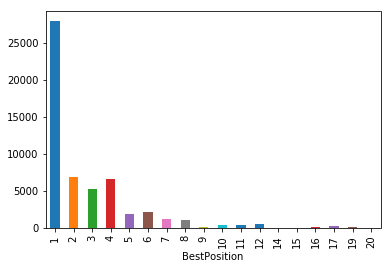

In [24]:
best_pos.Points.plot(kind = 'bar')